In [ ]:
# http://spacy.pythonhumanities.com/01_03_word_vectors.html
import json
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import spacy
!python -m spacy download en_core_web_md

2023-11-29 10:34:37.117438: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-29 10:34:37.117519: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-29 10:34:37.117566: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-29 10:34:38.858683: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 18.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


In [ ]:
# test nlp stuff
nlp = spacy.load("en_core_web_md")
text = "Ingredients ¼ cup canola oil 2 medium potatoes, peeled and quartered 1 large carrot, peeled and cut into cubes ½ small red bell pepper, cored and sliced into ½-inch thick strips ½ small green bell pepper, cored and sliced into ½-inch thick strips 4 pounds chicken, cut into serving pieces 1 small onion, peeled and sliced thinly 3 cloves garlic, peeled and minced 6 large Roma tomatoes 1 tablespoon fish sauce 1 cup water ½ cup frozen sweet peas thawed salt and pepper to taste Instructions 1. In a pan over medium heat, heat oil. 2. Add potatoes and carrots and cook, turning once or twice, until lightly browned. Remove from pan and drain on paper towels. 3. Remove excess oil from pan except for about 2 tablespoons. 4. Add bell peppers and cook for about 30 to 45 seconds. Remove from pan and drain on paper towels. 5. Add onions and garlic and cook until softened. 6. Add chicken and cook, turning on sides once or twice, until lightly browned but not cooked through. 7. Add tomatoes and cook, mashing regularly with back spoon until softened and release juices. 8. Add fish sauce and cook for about 1 to 2 minutes. 9. Add water and bring to a boil. 10. Lower heat, cover, and cook for about 20 to 30 minutes or until chicken is cooked through and sauce is thickened to desired consistency. 11. Add potatoes and carrots and continue to cook until fork-tender. 12. Add bell peppers and sweet peas. Cook for 1 to 2 minutes or until green peas are heated through and bell peppers are tender yet crisp. 13. Season with salt and pepper to taste. Serve hot."
doc = nlp(text)
filtered_tokens = " ".join([token.text for token in doc if not token.is_stop and not token.is_punct and not token.is_currency and not token.is_digit and not token.is_oov and not token.is_space and not token.is_stop and not token.like_num and not token.pos_ == "PROPN"])
sentence1 = list(doc.sents)[0]
# sentence1[0].vector
filtered_tokens

'Ingredients ¼ cup canola oil medium potatoes peeled quartered large carrot peeled cut cubes ½ small red bell pepper cored sliced ½-inch thick strips ½ small green bell pepper cored sliced ½-inch thick strips pounds chicken cut serving pieces small onion peeled sliced thinly cloves garlic peeled minced large tomatoes tablespoon fish sauce cup water ½ cup frozen sweet peas thawed salt pepper taste pan medium heat heat oil Add potatoes carrots cook turning twice lightly browned Remove pan drain paper towels Remove excess oil pan tablespoons Add bell peppers cook seconds Remove pan drain paper towels Add onions garlic cook softened Add chicken cook turning sides twice lightly browned cooked Add tomatoes cook mashing regularly spoon softened release juices Add fish sauce cook minutes Add water bring boil Lower heat cover cook minutes chicken cooked sauce thickened desired consistency Add potatoes carrots continue cook fork tender Add bell peppers sweet peas minutes green peas heated bell p

In [ ]:
doc1 = nlp("Ingredients ¼ cup canola oil 2 medium potatoes, peeled and quartered 1 large carrot, peeled and cut into cubes ½ small red bell pepper, cored and sliced into ½-inch thick strips ½ small green bell pepper, cored and sliced into ½-inch thick strips 4 pounds chicken, cut into serving pieces 1 small onion, peeled and sliced thinly 3 cloves garlic, peeled and minced 6 large Roma tomatoes 1 tablespoon fish sauce 1 cup water ½ cup frozen sweet peas thawed salt and pepper to taste Instructions 1. In a pan over medium heat, heat oil. 2. Add potatoes and carrots and cook, turning once or twice, until lightly browned. Remove from pan and drain on paper towels. 3. Remove excess oil from pan except for about 2 tablespoons. 4. Add bell peppers and cook for about 30 to 45 seconds. Remove from pan and drain on paper towels. 5. Add onions and garlic and cook until softened. 6. Add chicken and cook, turning on sides once or twice, until lightly browned but not cooked through. 7. Add tomatoes and cook, mashing regularly with back spoon until softened and release juices. 8. Add fish sauce and cook for about 1 to 2 minutes. 9. Add water and bring to a boil. 10. Lower heat, cover, and cook for about 20 to 30 minutes or until chicken is cooked through and sauce is thickened to desired consistency. 11. Add potatoes and carrots and continue to cook until fork-tender. 12. Add bell peppers and sweet peas. Cook for 1 to 2 minutes or until green peas are heated through and bell peppers are tender yet crisp. 13. Season with salt and pepper to taste. Serve hot.")
doc2 = nlp("Ingredients 1 egg 225g self-raising flour 1 tbsp golden caster sugar (optional) 250ml milk 50g butter, melted and cooled ½ tsp vanilla extract (optional) 1 tbsp sunflower or vegetable oil maple syrup and icing sugar, to serve (optional) Instructions 1. Crack the egg (for fluffier waffles, use only the yolk at this stage) into a large bowl, then tip in the flour and a generous pinch of salt. Add the sugar, if using, then gradually whisk in the milk followed by the melted butter until smooth. Whisk in the vanilla, if using. If you've chosen to make fluffier waffles, whisk the egg white to soft peaks, then gently fold this into the batter. Alternatively, make the batter by blitzing all the ingredients together using a blender or hand blender. Can be made 1-2 hrs ahead and chilled. 2. Heat a waffle maker following the manufacturer's instructions, brush with a little of the oil, then ladle in enough batter to just cover the surface. Cook following the manufacturer's instructions (usually 5-6 mins) until the waffles are golden brown and crisp. Serve immediately or keep warm in a low oven while you make the rest. Drizzle with maple syrup or sprinkle with icing sugar, if you like.")
filtered_tokens1 = list(dict.fromkeys([token.text for token in doc1 if not token.is_stop and not token.is_punct and not token.is_currency and not token.is_digit and not token.is_oov and not token.is_space and not token.is_stop and not token.like_num and not token.pos_ == "PROPN"]))
filtered_tokens2 = list(dict.fromkeys([token.text for token in doc2 if not token.is_stop and not token.is_punct and not token.is_currency and not token.is_digit and not token.is_oov and not token.is_space and not token.is_stop and not token.like_num and not token.pos_ == "PROPN"]))
# words = ['bark','black','cat','bite','human','book']
# word = 'dog'
# word_nlp = nlp(word)

new_words = [(w, doc1.similarity(nlp(w))) for w in filtered_tokens2]
new_words.sort(key=lambda x: x[1], reverse=True)

for w, value in new_words:
    print(f"{w} - {value}")

vegetable - 0.6914097541099031
usually - 0.6759172118889164
gradually - 0.6435879905761559
optional - 0.5892587203813754
extract - 0.5794399390092839
batter - 0.5765175775771709
surface - 0.5699684852478527
ingredients - 0.5617945938406437
instructions - 0.5592203069353577
large - 0.5396829148724372
blender - 0.5366045374325236
Alternatively - 0.5342104308580369
Ingredients - 0.5325107655417538
butter - 0.5278055910165276
sprinkle - 0.5278055910165276
icing - 0.5139052051448423
immediately - 0.5135637784571734
following - 0.5112809037580585
gently - 0.5088768378212065
blitzing - 0.5000669356761623
cover - 0.4861968732946873
little - 0.4677846475690904
flour - 0.4652140865648006
generous - 0.46476560440255943
salt - 0.46472064932017737
raising - 0.4630565054211715
Instructions - 0.4627500968421704
rest - 0.4617525700875135
brown - 0.46095211058717434
smooth - 0.4582038928280218
sunflower - 0.44669780389711583
use - 0.42899195716390265
white - 0.42377993327464025
followed - 0.42291380565

In [ ]:
# test similarity between two sample strings
doc1 = nlp("<div class='ingredients'><h3>Ingredients</h3><br>¼ cup canola oil<br>2 medium potatoes, peeled and quartered<br>1 large carrot, peeled and cut into cubes<br>½ small red bell pepper, cored and sliced into ½-inch thick strips<br>½ small green bell pepper, cored and sliced into ½-inch thick strips<br>4 pounds chicken, cut into serving pieces<br>1 small onion, peeled and sliced thinly<br>3 cloves garlic, peeled and minced<br>6 large Roma tomatoes<br>1 tablespoon fish sauce<br>1 cup water<br>½ cup frozen sweet peas thawed<br>salt and pepper to taste</div><br><div class='instructions'><h3>Instructions</h3><br>1. In a pan over medium heat, heat oil.<br>2. Add potatoes and carrots and cook, turning once or twice, until lightly browned. Remove from pan and drain on paper towels.<br>3. Remove excess oil from pan except for about 2 tablespoons.<br>4. Add bell peppers and cook for about 30 to 45 seconds. Remove from pan and drain on paper towels.<br>5. Add onions and garlic and cook until softened.<br>6. Add chicken and cook, turning on sides once or twice, until lightly browned but not cooked through.<br>7. Add tomatoes and cook, mashing regularly with back spoon until softened and release juices.<br>8. Add fish sauce and cook for about 1 to 2 minutes.<br>9. Add water and bring to a boil.<br>10. Lower heat, cover, and cook for about 20 to 30 minutes or until chicken is cooked through and sauce is thickened to desired consistency.<br>11. Add potatoes and carrots and continue to cook until fork-tender.<br>12. Add bell peppers and sweet peas. Cook for 1 to 2 minutes or until green peas are heated through and bell peppers are tender yet crisp.<br>13. Season with salt and pepper to taste. Serve hot.<br><br><a href='https://www.kawalingpinoy.com/chicken-afritada'>Source</a></div>")
doc2 = nlp("<div class='ingredients'><h3>Ingredients</h3><br>1 ½ lbs chicken cut into serving pieces<br>1 ½ cups rice uncooked<br>34 ounces water about 1 liter<br>2 Tablespoons fish sauce<br>1 teaspoon garlic<br>1/4 teaspoon ground black pepper<br>1 cup onion minced<br>4 eggs hard boiled<br>1 cup scallions green onions, minced<br>2 knobs ginger julienned<br>3 tbsp safflower kasubha<br>1 chicken cube bouillon<br>1 lemon or 4 pieces calamansi<br>2 Tablespoon cooking oil</div><br><div class='instructions'><h3>Instructions</h3><br>1. In a pot, heat the cooking oil then saute the garlic, onion, and ginger<br>2. Dash-in some ground black pepper<br>3. Add the chicken cube and cook until the cube melts<br>3. Put-in the chicken and cook until outer layer color turns golden brown<br>4. Add the fish sauce and uncooked rice then mix and cook for a few minutes<br>5. Pour-in the water and bring to a boil<br>6. Stir occasionally and simmer until the rice is fully cooked (about 30 to 40 minutes)<br>7. Put-in the hard boiled eggs<br>8. Add the safflower for additional color and aroma<br>9. Serve hot with garlic, minced scallions, and lemon.<br><br><a href='https://panlasangpinoy.com/arroz-caldo'>Source</a></div>")

# should be the same
doc1.similarity(doc2), doc2.similarity(doc1)
dir(doc2)

['_',
 '__bytes__',
 '__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__ne__',
 '__new__',
 '__pyx_vtable__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__unicode__',
 '_bulk_merge',
 '_context',
 '_get_array_attrs',
 '_realloc',
 '_vector',
 '_vector_norm',
 'cats',
 'char_span',
 'copy',
 'count_by',
 'doc',
 'ents',
 'extend_tensor',
 'from_array',
 'from_bytes',
 'from_dict',
 'from_disk',
 'from_docs',
 'from_json',
 'get_extension',
 'get_lca_matrix',
 'has_annotation',
 'has_extension',
 'has_unknown_spaces',
 'has_vector',
 'is_nered',
 'is_parsed',
 'is_sentenced',
 'is_tagged',
 'lang',
 'lang_',
 'mem',
 'noun_chunks',
 'noun_chunks_iterator',
 'remove_extension',
 'retokenize',
 'sentiment',
 'sents',
 'set

In [ ]:
# https://stackoverflow.com/questions/70883842/calculate-similarity-between-one-given-word-and-a-random-list-of-words
# determine the similarities of the ingredients and recipes for each food
with open("recipes.json", encoding="utf-8") as f:
    data1 = json.load(f)

    similarities = []
    numbers_list = []
    most_similar_words = []

    for key in data1:
        value1 = data1[key]
        data2 = data1
        numbers = []
        for key in data2:
            value2 = data2[key]
            value1_nlp = nlp(" ".join([token.text for token in nlp(value1) if not token.is_stop and not token.is_punct and not token.is_currency and not token.is_digit and not token.is_oov and not token.is_space and not token.is_stop and not token.like_num and not token.pos_ == "PROPN"]))
            value2_nlp = nlp(" ".join([token.text for token in nlp(value2) if not token.is_stop and not token.is_punct and not token.is_currency and not token.is_digit and not token.is_oov and not token.is_space and not token.is_stop and not token.like_num and not token.pos_ == "PROPN"]))
            similarity = value1_nlp.similarity(value2_nlp)
            numbers.append(similarity)
            similarities.append({key: similarity})

            filtered_tokens1 = list(dict.fromkeys([token.text for token in nlp(value1) if not token.is_stop and not token.is_punct and not token.is_currency and not token.is_digit and not token.is_oov and not token.is_space and not token.is_stop and not token.like_num and not token.pos_ == "PROPN"]))
            filtered_tokens2 = list(dict.fromkeys([token.text for token in nlp(value2) if not token.is_stop and not token.is_punct and not token.is_currency and not token.is_digit and not token.is_oov and not token.is_space and not token.is_stop and not token.like_num and not token.pos_ == "PROPN"]))
            # words = ['bark','black','cat','bite','human','book']
            # word = 'dog'
            # word_nlp = nlp(word)

            new_words = [(w, value1_nlp.similarity(nlp(w))) for w in filtered_tokens2]
            new_words.sort(key=lambda x: x[1], reverse=True)
            most_similar_words.append({"mostSimilarWords": new_words[0:5]})

        numbers_list.append(numbers)
        ''' for w, value in new_words:
            print(f"{w} - {value}") '''

    print(most_similar_words)
    np_values = np.asarray(numbers_list)

[{'mostSsimilarWords': [('potatoes', 0.7504283453106854), ('cloves', 0.7434837251631724), ('garlic', 0.7434837251631724), ('cooked', 0.741809567176023), ('carrots', 0.7295435076423135)]}, {'mostSsimilarWords': [('garlic', 0.7434837251631724), ('uncooked', 0.741809567176023), ('cooked', 0.741809567176023), ('onion', 0.7104051249676288), ('scallions', 0.7083474925950998)]}, {'mostSsimilarWords': [('cloves', 0.7434837251631724), ('garlic', 0.7434837251631724), ('onion', 0.7104051249676288), ('frying', 0.7042558227370708), ('cooking', 0.6842126314159901)]}, {'mostSsimilarWords': [('roasted', 0.6939356248296004), ('chicken', 0.6790595999428298), ('boiled', 0.635873092962843), ('rice', 0.6328420546548378), ('Roast', 0.6286656320330781)]}, {'mostSsimilarWords': [('sesame', 0.7434837251631724), ('cloves', 0.7434837251631724), ('garlic', 0.7434837251631724), ('cooked', 0.741809567176023), ('vegetables', 0.7345894338765804)]}, {'mostSsimilarWords': [('butter', 0.7617999244174946), ('mixture', 0.

In [ ]:
most_similar_words

[{'mostSsimilarWords': [('potatoes', 0.7504283453106854),
   ('cloves', 0.7434837251631724),
   ('garlic', 0.7434837251631724),
   ('cooked', 0.741809567176023),
   ('carrots', 0.7295435076423135)]},
 {'mostSsimilarWords': [('garlic', 0.7434837251631724),
   ('uncooked', 0.741809567176023),
   ('cooked', 0.741809567176023),
   ('onion', 0.7104051249676288),
   ('scallions', 0.7083474925950998)]},
 {'mostSsimilarWords': [('cloves', 0.7434837251631724),
   ('garlic', 0.7434837251631724),
   ('onion', 0.7104051249676288),
   ('frying', 0.7042558227370708),
   ('cooking', 0.6842126314159901)]},
 {'mostSsimilarWords': [('roasted', 0.6939356248296004),
   ('chicken', 0.6790595999428298),
   ('boiled', 0.635873092962843),
   ('rice', 0.6328420546548378),
   ('Roast', 0.6286656320330781)]},
 {'mostSsimilarWords': [('sesame', 0.7434837251631724),
   ('cloves', 0.7434837251631724),
   ('garlic', 0.7434837251631724),
   ('cooked', 0.741809567176023),
   ('vegetables', 0.7345894338765804)]},
 {'mo

In [29]:
doc1 = nlp("¼ cup canola oil 2 medium potatoes, peeled and quartered 1 large carrot, peeled and cut into cubes ½ small red bell pepper, cored and sliced into ½-inch thick strips ½ small green bell pepper, cored and sliced into ½-inch thick strips 4 pounds chicken, cut into serving pieces 1 small onion, peeled and sliced thinly 3 cloves garlic, peeled and minced 6 large Roma tomatoes 1 tablespoon fish sauce 1 cup water ½ cup frozen sweet peas thawed salt and pepper to taste 1. In a pan over medium heat, heat oil. 2. Add potatoes and carrots and cook, turning once or twice, until lightly browned. Remove from pan and drain on paper towels. 3. Remove excess oil from pan except for about 2 tablespoons. 4. Add bell peppers and cook for about 30 to 45 seconds. Remove from pan and drain on paper towels. 5. Add onions and garlic and cook until softened. 6. Add chicken and cook, turning on sides once or twice, until lightly browned but not cooked through. 7. Add tomatoes and cook, mashing regularly with back spoon until softened and release juices. 8. Add fish sauce and cook for about 1 to 2 minutes. 9. Add water and bring to a boil. 10. Lower heat, cover, and cook for about 20 to 30 minutes or until chicken is cooked through and sauce is thickened to desired consistency. 11. Add potatoes and carrots and continue to cook until fork-tender. 12. Add bell peppers and sweet peas. Cook for 1 to 2 minutes or until green peas are heated through and bell peppers are tender yet crisp. 13. Season with salt and pepper to taste. Serve hot.")
doc2 = nlp("1 ½ lbs chicken cut into serving pieces 1 ½ cups rice uncooked 34 ounces water about 1 liter 2 Tablespoons fish sauce 1 teaspoon garlic 1/4 teaspoon ground black pepper 1 cup onion minced 4 eggs hard boiled 1 cup scallions green onions, minced 2 knobs ginger julienned 3 tbsp safflower kasubha 1 chicken cube bouillon 1 lemon or 4 pieces calamansi 2 Tablespoon cooking oil 1. In a pot, heat the cooking oil then saute the garlic, onion, and ginger 2. Dash-in some ground black pepper 3. Add the chicken cube and cook until the cube melts 3. Put-in the chicken and cook until outer layer color turns golden brown 4. Add the fish sauce and uncooked rice then mix and cook for a few minutes 5. Pour-in the water and bring to a boil 6. Stir occasionally and simmer until the rice is fully cooked (about 30 to 40 minutes) 7. Put-in the hard boiled eggs 8. Add the safflower for additional color and aroma 9. Serve hot with garlic, minced scallions, and lemon.")
similarity = doc1.similarity(doc2)
# dir(doc1.vocab)
list(doc1.vocab)

 ...]

In [20]:
recipe_dict_list = []
recipe_names = list(data1.keys())
x = 0
y = len(recipe_names)

for name in recipe_names:
    relevant_similarities = []
    for value in similarities[x:y]:
        relevant_similarities.append(value)
    recipe_dict_list.append({name:relevant_similarities})
    x = x + len(recipe_names)
    y = y + len(recipe_names)

final = {}
for name in recipe_names:
    data = []
    names = []
    similar_words = []
    for index in range(len(recipe_dict_list[recipe_names.index(name)][name])):
        for key in recipe_dict_list[recipe_names.index(name)][name][index]:
            data.append(recipe_dict_list[recipe_names.index(name)][name][index][key])
            names.append(list(recipe_dict_list[recipe_names.index(name)][name][index].keys())[0])
    data, names = (list(x) for x in zip(*sorted(zip(data, names))))

    # [::-1] - reverse the list
    # [1:]   - ignore the first item, which is the same food with a score of 1.0
    # [;5]   - get the top 5 results
    data = data[::-1][1:][:5]
    names = names[::-1][1:][:5]

    with open("recipes.json", encoding="utf-8") as f:
        data1 = json.load(f)

        for name in recipe_names:
            filtered_tokens1 = list(dict.fromkeys([token.text for token in nlp(value1) if not token.is_stop and not token.is_punct and not token.is_currency and not token.is_digit and not token.is_oov and not token.is_space and not token.is_stop and not token.like_num and not token.pos_ == "PROPN"]))
            filtered_tokens2 = list(dict.fromkeys([token.text for token in nlp(value2) if not token.is_stop and not token.is_punct and not token.is_currency and not token.is_digit and not token.is_oov and not token.is_space and not token.is_stop and not token.like_num and not token.pos_ == "PROPN"]))
            # words = ['bark','black','cat','bite','human','book']
            # word = 'dog'
            # word_nlp = nlp(word)

            new_words = [(w, value1_nlp.similarity(nlp(w))) for w in filtered_tokens2]
            new_words.sort(key=lambda x: x[1], reverse=True)
            most_similar_words.append({"mostSimilarWords": new_words[0:5]})

    final[name] = {"food": names, "scores": data, "mostSimilarWords": new_words[0:5]}

''' for name in recipe_names:
    doc1 = nlp("Ingredients ¼ cup canola oil 2 medium potatoes, peeled and quartered 1 large carrot, peeled and cut into cubes ½ small red bell pepper, cored and sliced into ½-inch thick strips ½ small green bell pepper, cored and sliced into ½-inch thick strips 4 pounds chicken, cut into serving pieces 1 small onion, peeled and sliced thinly 3 cloves garlic, peeled and minced 6 large Roma tomatoes 1 tablespoon fish sauce 1 cup water ½ cup frozen sweet peas thawed salt and pepper to taste Instructions 1. In a pan over medium heat, heat oil. 2. Add potatoes and carrots and cook, turning once or twice, until lightly browned. Remove from pan and drain on paper towels. 3. Remove excess oil from pan except for about 2 tablespoons. 4. Add bell peppers and cook for about 30 to 45 seconds. Remove from pan and drain on paper towels. 5. Add onions and garlic and cook until softened. 6. Add chicken and cook, turning on sides once or twice, until lightly browned but not cooked through. 7. Add tomatoes and cook, mashing regularly with back spoon until softened and release juices. 8. Add fish sauce and cook for about 1 to 2 minutes. 9. Add water and bring to a boil. 10. Lower heat, cover, and cook for about 20 to 30 minutes or until chicken is cooked through and sauce is thickened to desired consistency. 11. Add potatoes and carrots and continue to cook until fork-tender. 12. Add bell peppers and sweet peas. Cook for 1 to 2 minutes or until green peas are heated through and bell peppers are tender yet crisp. 13. Season with salt and pepper to taste. Serve hot.")
    doc2 = nlp("Ingredients 1 egg 225g self-raising flour 1 tbsp golden caster sugar (optional) 250ml milk 50g butter, melted and cooled ½ tsp vanilla extract (optional) 1 tbsp sunflower or vegetable oil maple syrup and icing sugar, to serve (optional) Instructions 1. Crack the egg (for fluffier waffles, use only the yolk at this stage) into a large bowl, then tip in the flour and a generous pinch of salt. Add the sugar, if using, then gradually whisk in the milk followed by the melted butter until smooth. Whisk in the vanilla, if using. If you've chosen to make fluffier waffles, whisk the egg white to soft peaks, then gently fold this into the batter. Alternatively, make the batter by blitzing all the ingredients together using a blender or hand blender. Can be made 1-2 hrs ahead and chilled. 2. Heat a waffle maker following the manufacturer's instructions, brush with a little of the oil, then ladle in enough batter to just cover the surface. Cook following the manufacturer's instructions (usually 5-6 mins) until the waffles are golden brown and crisp. Serve immediately or keep warm in a low oven while you make the rest. Drizzle with maple syrup or sprinkle with icing sugar, if you like.")
    filtered_tokens1 = list(dict.fromkeys([token.text for token in doc1 if not token.is_stop and not token.is_punct and not token.is_currency and not token.is_digit and not token.is_oov and not token.is_space and not token.is_stop and not token.like_num and not token.pos_ == "PROPN"]))
    filtered_tokens2 = list(dict.fromkeys([token.text for token in doc2 if not token.is_stop and not token.is_punct and not token.is_currency and not token.is_digit and not token.is_oov and not token.is_space and not token.is_stop and not token.like_num and not token.pos_ == "PROPN"]))
# words = ['bark','black','cat','bite','human','book']
# word = 'dog'
# word_nlp = nlp(word)

new_words = [(w, doc1.similarity(nlp(w))) for w in filtered_tokens2]
new_words.sort(key=lambda x: x[1], reverse=True)

for w, value in new_words:
    print(f"{w} - {value}") '''

temp = json.dumps(final)
final_json = json.loads(temp)

with open("recipes_final.json", "w", encoding="utf-8") as f:
    json.dump(final_json, f, ensure_ascii=False, indent=4)

KeyboardInterrupt: ignored

<Axes: >

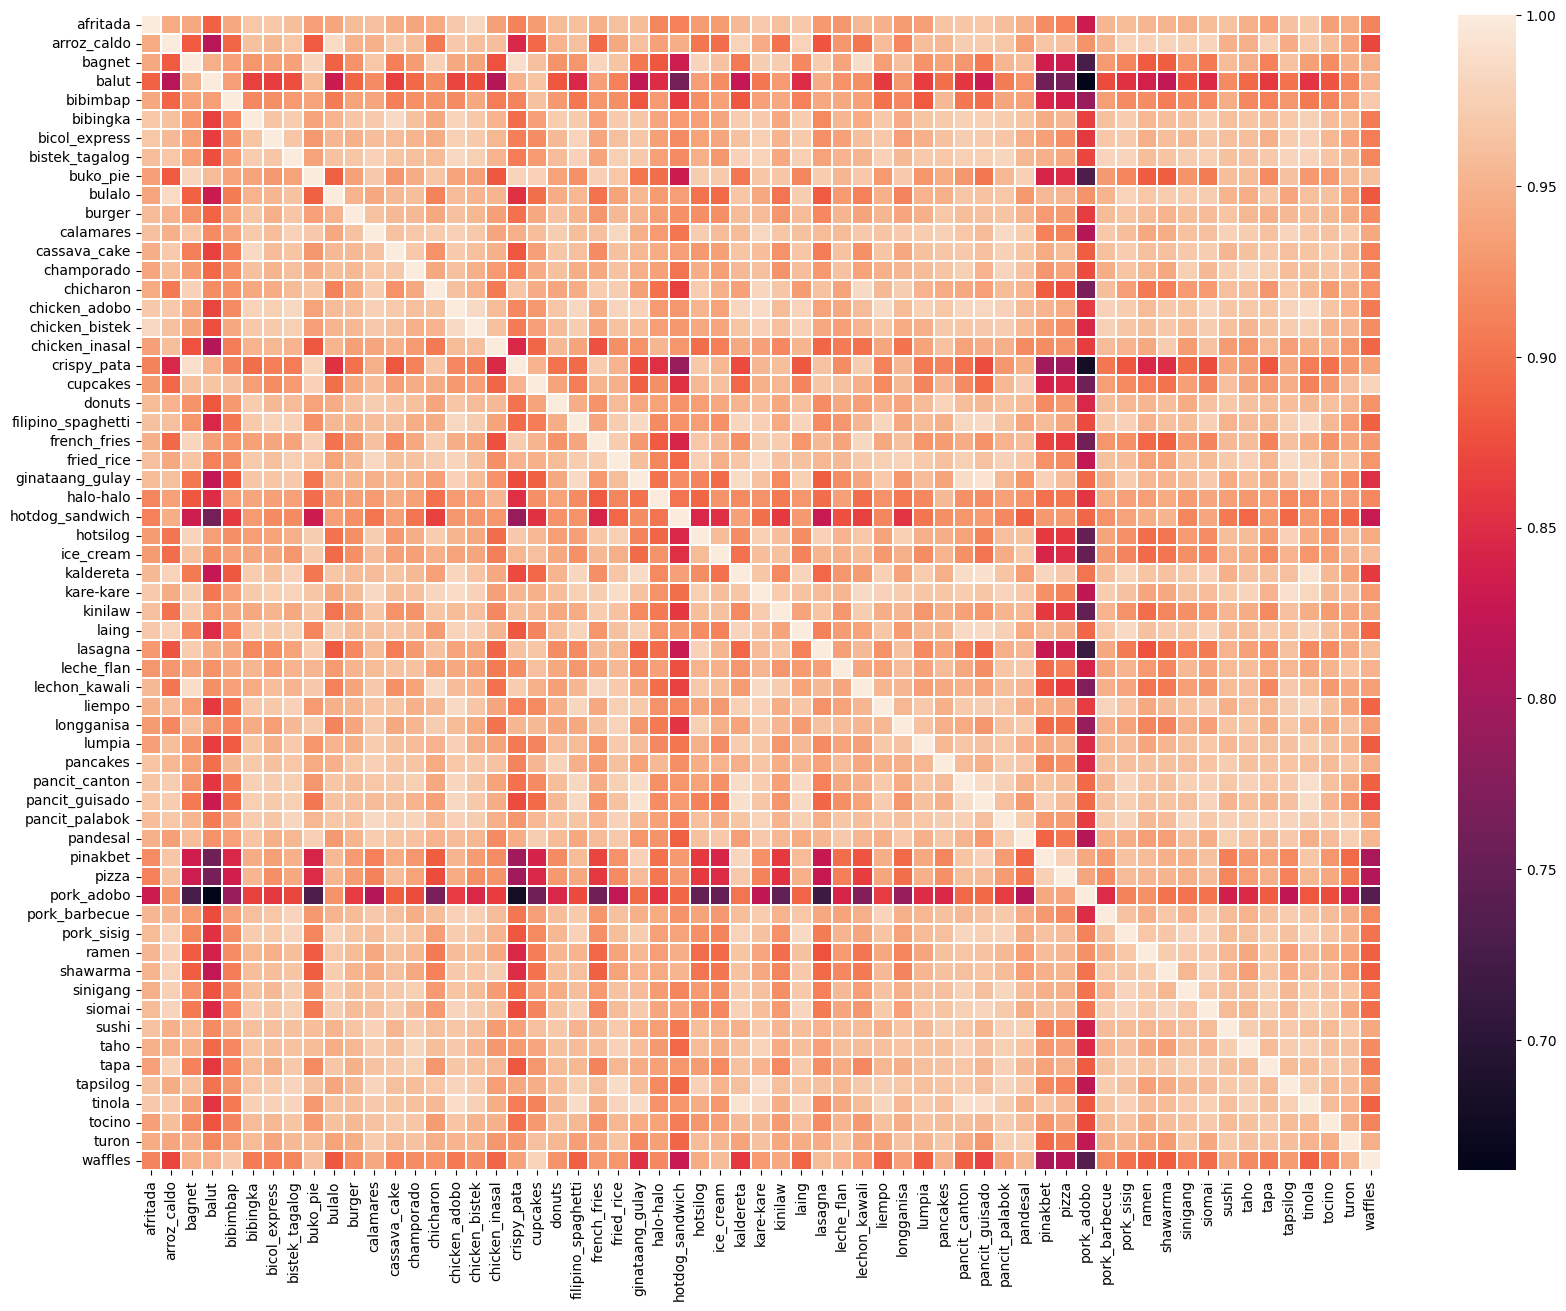

In [ ]:
# is this a confusion matrix?
fig, ax = plt.subplots(figsize=(20,15))
sns.heatmap(
    np_values,
    linewidth=0.1,
    xticklabels=recipe_names,
    yticklabels=recipe_names,
    ax=ax,
    # annot=True # DO NOT INCLUDE
)

In [ ]:
# screw this part, ignore this garbage
from sklearn.metrics import confusion_matrix

# https://datascience.stackexchange.com/questions/46019/continuous-variable-not-supported-in-confusion-matrix
cutoff = 0.7                                    # decide on a cutoff limit
y_pred_classes = np.zeros_like(np_values[1])    # initialise a matrix full with zeros
y_pred_classes[np_values[1] > cutoff] = 1       # add a 1 if the cutoff was breached

y_test_classes = np.zeros_like(np_values[0])
y_test_classes[np_values[0] > cutoff] = 1

confusion_matrix(y_test_classes, y_pred_classes)
# add precision, recall, f-1 score later

array([[61]])

NLP idea/application:
1. user passes an image to the website
2. whatever results that come from the image passed get generated into the webpage (the ingredients and instructions section of the results)
3. NLP part comes in, pass the text inside ingredients and instructions section to an NLP model
4. the results will be the top 5 most similar food items to the one predicted from the image, completely unrelated to the image predictions above the page